In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Palladium.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,1/1/2018
1,1066.5,1096.0,1099.0,1066.0,1/2/2018
2,1095.5,1088.0,1097.0,1084.0,1/3/2018
3,1086.5,1102.5,1108.5,1083.5,1/4/2018
4,1100.0,1091.5,1103.0,1086.5,1/5/2018


In [3]:
df.describe()

,Open,Close,High,Low
count,2110.000000,2110.000000,2110.000000,2110.000000
mean,1719.885199,1723.637678,1746.066469,1696.220142
std,569.588734,563.748196,579.079533,559.238724
min,0.000000,846.000000,0.000000,0.000000
25%,1216.375000,1219.250000,1230.250000,1199.500000
50%,1736.750000,1740.000000,1763.500000,1702.250000
75%,2181.500000,2180.000000,2214.500000,2144.375000
max,3205.000000,3178.000000,3435.500000,3008.000000


In [4]:
df.loc[0,:]

Open       1067.5
Close      1067.5
High       1067.5
Low        1067.5
Date     1/1/2018
Name: 0, dtype: object

In [5]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)
df

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,2018-01-01
1,1066.5,1096.0,1099.0,1066.0,2018-01-02
2,1095.5,1088.0,1097.0,1084.0,2018-01-03
3,1086.5,1102.5,1108.5,1083.5,2018-01-04
4,1100.0,1091.5,1103.0,1086.5,2018-01-05
...,...,...,...,...,...
2105,995.5,975.5,997.0,969.5,2024-05-28
2106,982.5,968.0,983.0,946.5,2024-05-29
2107,957.0,950.5,962.0,932.5,2024-05-30
2108,949.5,914.5,956.0,903.5,2024-05-31


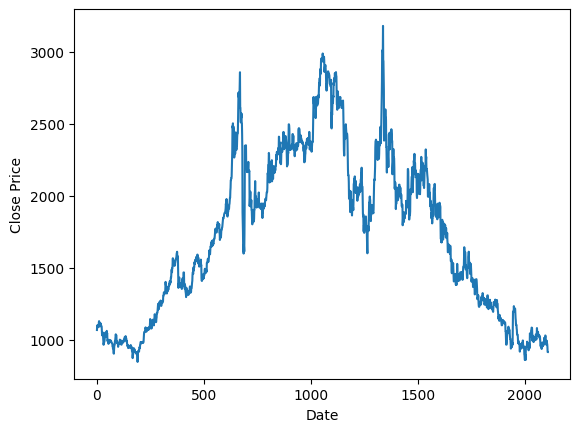

In [6]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [7]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,1067.5
1,1096.0
2,1088.0
3,1102.5
4,1091.5


In [8]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
# Chia train test theo tỉ lệ 6:4
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [10]:
train_data

array([[0.09498285],
       [0.10720412],
       [0.10377358],
       ...,
       [0.35891938],
       [0.33490566],
       [0.32332762]])

In [11]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [12]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [13]:
X_test

array([[0.38100343, 0.40415952, 0.40415952, ..., 0.44253859, 0.45497427,
        0.49721269],
       [0.40415952, 0.40415952, 0.40415952, ..., 0.45497427, 0.49721269,
        0.5233705 ],
       [0.40415952, 0.40415952, 0.38957976, ..., 0.49721269, 0.5233705 ,
        0.54309605],
       ...,
       [0.04674099, 0.05488851, 0.04459691, ..., 0.05231561, 0.06303602,
        0.05553173],
       [0.05488851, 0.04459691, 0.04266724, ..., 0.06303602, 0.05553173,
        0.05231561],
       [0.04459691, 0.04266724, 0.03859348, ..., 0.05553173, 0.05231561,
        0.04481132]])

In [14]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1235, 30) (1235,)
(813, 30) (813,)


In [15]:
#Huấn luyện model SVR
model = SVR(kernel='linear', C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.01, kernel='linear')

In [16]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
#y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [17]:
y_pred

array([0.47621816, 0.50510868, 0.53075942, 0.53844799, 0.54686778,
       0.55709226, 0.57169397, 0.6145595 , 0.63088313, 0.63214415,
       0.63705155, 0.60935156, 0.60524805, 0.60729496, 0.60019282,
       0.58972467, 0.58494893, 0.57175986, 0.54305368, 0.54591419,
       0.54454128, 0.56579758, 0.58928578, 0.59667073, 0.5550015 ,
       0.5437331 , 0.57290462, 0.5762063 , 0.58357841, 0.6146159 ,
       0.61147319, 0.6441643 , 0.63603623, 0.62198274, 0.63855728,
       0.68441347, 0.72357224, 0.74521959, 0.78200661, 0.8512389 ,
       0.85903625, 0.85714914, 0.84807578, 0.898031  , 0.83376138,
       0.80672123, 0.76323554, 0.70986508, 0.60492025, 0.58867622,
       0.59445164, 0.63664732, 0.639551  , 0.65356394, 0.66219101,
       0.6425208 , 0.63029512, 0.63458728, 0.57217458, 0.58965536,
       0.55100688, 0.51935148, 0.55171367, 0.57738326, 0.6181306 ,
       0.64291239, 0.68942511, 0.67076607, 0.65311847, 0.65708211,
       0.71019421, 0.71373769, 0.70555068, 0.69913868, 0.65926

In [18]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.21808912236141303
Testing MSE: 0.0029051959595056075
Testing RMSE: 0.053899869754069046


In [19]:
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_pred

array([1956.54075561, 2023.91344654, 2083.73095665, 2101.66071821,
       2121.29566475, 2145.1391454 , 2179.19033626, 2279.15274477,
       2317.21946573, 2320.16015996, 2331.60422503, 2267.00784002,
       2257.43844319, 2262.21184108, 2245.64965524, 2221.2379215 ,
       2210.10090258, 2179.34399759, 2112.40118584, 2119.07189576,
       2115.87026227, 2165.43995759, 2220.21442848, 2237.4361452 ,
       2140.26349803, 2113.98558208, 2182.01357619, 2189.71309784,
       2206.90484577, 2279.28428703, 2271.95548074, 2348.19113782,
       2329.23648475, 2296.46374072, 2335.11556717, 2442.05221673,
       2533.37045425, 2583.85207449, 2669.63941722, 2831.08911736,
       2849.27253801, 2844.87179374, 2823.71273031, 2940.20828334,
       2790.33154035, 2727.27391956, 2625.86527964, 2501.40537104,
       2256.67403212, 2218.79293531, 2232.26123432, 2330.6615419 ,
       2337.43292847, 2370.11110588, 2390.22944169, 2344.35850524,
       2315.84821411, 2325.85753341, 2180.31110987, 2221.07628

In [20]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.03859348 0.04459691 0.04459691 0.05789022 0.05638937 0.04652659
 0.05295883 0.057247   0.057247   0.057247   0.05060034 0.05767581
 0.07161235 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782
 0.07825901 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561
 0.06303602 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393]
0 day output 0.09824940912197468
1 day input [0.04459691 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883
 0.057247   0.057247   0.057247   0.05060034 0.05767581 0.07161235
 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901
 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561 0.06303602
 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393 0.09824941]
1 day output 0.14824315969892754
2 day input [0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901 0.06689537
 0.05403087 0.05167238 0.05

In [21]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
lags=30
i=0
while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.03859348 0.04459691 0.04459691 0.05789022 0.05638937 0.04652659
 0.05295883 0.057247   0.057247   0.057247   0.05060034 0.05767581
 0.07161235 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782
 0.07825901 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561
 0.06303602 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393]
0 day output 0.09824940912197468
1 day input [0.04459691 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883
 0.057247   0.057247   0.057247   0.05060034 0.05767581 0.07161235
 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901
 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561 0.06303602
 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393 0.09824941]
1 day output 0.14824315969892754
2 day input [0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901 0.06689537
 0.05403087 0.05167238 0.05

In [22]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
lags=30
i=0
while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.03859348 0.04459691 0.04459691 0.05789022 0.05638937 0.04652659
 0.05295883 0.057247   0.057247   0.057247   0.05060034 0.05767581
 0.07161235 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782
 0.07825901 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561
 0.06303602 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393]
0 day output 0.09824940912197468
1 day input [0.04459691 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883
 0.057247   0.057247   0.057247   0.05060034 0.05767581 0.07161235
 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901
 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561 0.06303602
 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393 0.09824941]
1 day output 0.14824315969892754
2 day input [0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901 0.06689537
 0.05403087 0.05167238 0.05

In [23]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

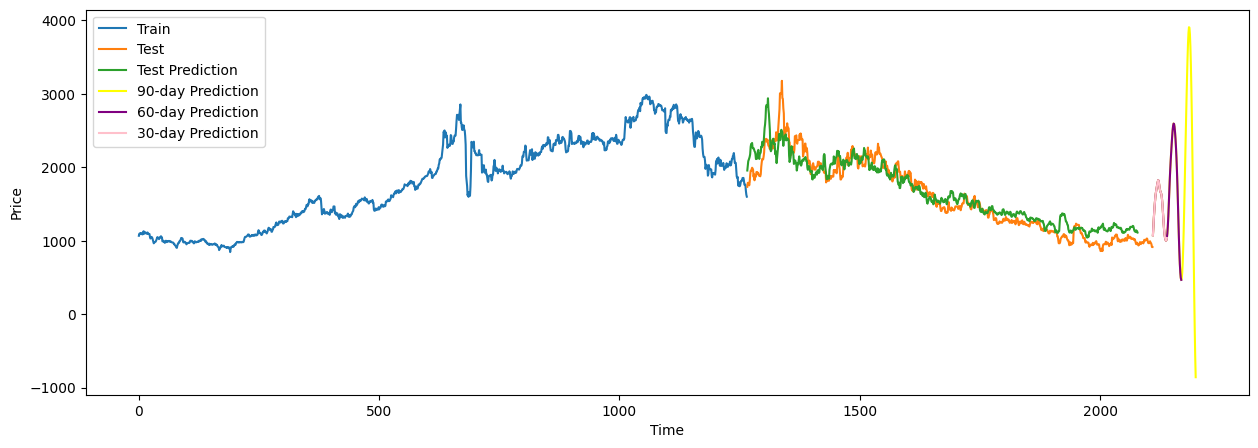

In [24]:
plt.figure(figsize=(15, 5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()